In [1]:
import math
import Duns_and_Ros as dr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""l = float(input('Введите глубину скважины, м '))
d = float(input('Введите диаметр газа, м '))
eps = float(input('Введите значение шероховатости, м '))
mu_g = float(input('Введите значение вязкости газа, Па*с '))
sigm = float(input('Введите значение поверхнастного натяжения, кг/с2 '))
q_l = float(input('Введите дебит жидкости, м3/с '))
q_g = float(input('Введите дебит газа, м3/с '))
ro_l = float(input('Введите плотность жидкости, кг/м3 '))
ro_g = float(input('Введите плотность газа, кг/м3 '))"""

mu_o = float(0.97/1000)
mu_g = float(0.016/1000)
sigm = float(8.41/1000)
d = float(0.1524)
q_l = float(0.022)
q_g = float(0.0214)
ro_l = float(762.64)
ro_g = float(94.19)
eps = float(18.288*10**(-6))
l = 3000
serch = int(input("Введите 0 если надо найти Устьевое давление,1 если Забойное "))
if serch == 0:
    p_wf = float(input("Введите Забойное давление "))
    p_wh = 0
else:
    p_wh = float(input("Введите Устьевое давление "))
    p_wf = 0
flow, v_sl, v_sg, N_lv, N_gv, N_d, N_l = dr.define_fp(d, q_l, q_g, ro_l, sigm, mu_o)

Введите 0 если надо найти Устьевое давление,1 если Забойное 1
Введите Устьевое давление 2


In [3]:
def calc_abc(l, p_wf, p_wh):
    if p_wf==0:
        return dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, serch, p_wf, p_wh, flow, l)*l+p_wh
    else:
        return p_wf-dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, serch, p_wf, p_wh, flow, l)*l

In [4]:
print(flow)
spisok=[calc_abc(i, p_wf, p_wh) for i in range(l+1)]
if spisok[0]>spisok[1]:
    spisok.reverse()

Пузырьковый поток


Тип потока: Пузырьковый поток
Градиент давления равения dp_dl =  0.004714898838031146 , МПа
Забойное давление p_wf =  16.14469651409344 , МПа


Text(0, 0.5, 'P, МПа')

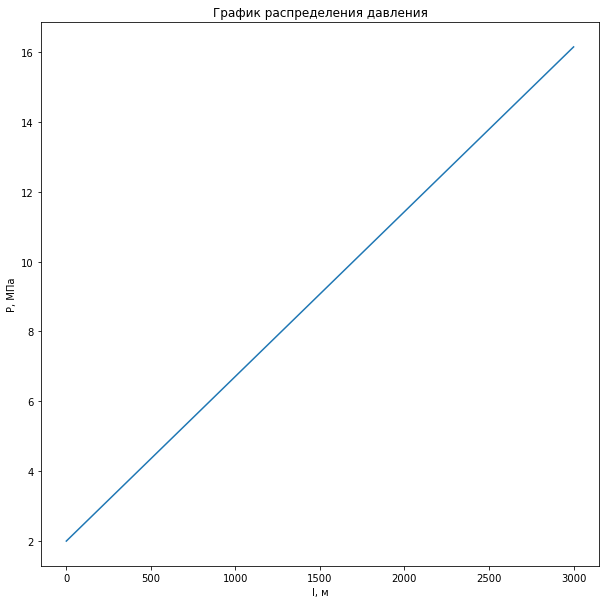

In [5]:
print('Тип потока:', flow)
print('Градиент давления равения dp_dl = ', dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, serch, p_wf, p_wh, flow, l), ', МПа')
if serch == 0:
    print('Устьевое давление p_wh = ', dr.calc_pressure(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, serch, p_wf, p_wh, flow, l), ', МПа')
else:
    print('Забойное давление p_wf = ', dr.calc_pressure(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, serch, p_wf, p_wh, flow, l), ', МПа')

plt.figure(figsize=(10, 10))
c=[]
for i in range(l+1):
    c.append(i)
plt.plot(c, spisok)
plt.title("График распределения давления")
plt.xlabel("l, м")
plt.ylabel("P, МПа")